<img src = "https://global-uploads.webflow.com/5f0d53c042a9ed6288de7f8d/5f6337ae2cfaa10946ceeb06_Hacktiv8%20logo%20horizontal%2001%20black-p-500.png" width = 400>


# Hacktiv8 PTP Introduction to Data Science Projects 1

Nama              : Desi Suci Nopianti <br>
Program           : Python for Data Science <br>

## Project Over View

Dataset ini mencatat setiap penjualan bangunan atau unit bangunan (seperti apartemen) di pasar properti New York City selama 12 bulan. Data tersebut mencakup lokasi, alamat, jenis properti, harga jual, dan tanggal penjualan.

Beberapa informasi tambahan yang diberikan dalam teks ini meliputi penjelasan singkat tentang kode digit untuk setiap borough (daerah) di NYC, penjelasan tentang kombinasi Borough, Block, dan Lot yang membentuk kunci unik untuk properti, serta penjelasan tentang jenis bangunan pada berbagai waktu.

Teks juga mencatat bahwa dalam dataset ini, terdapat penjualan dengan jumlah dolar yang sangat kecil, seringkali nol, yang sebenarnya merupakan pemindahan hak kepemilikan antara pihak-pihak tertentu, seperti orangtua yang mentransfer kepemilikan rumah kepada anak mereka.

Selain itu, dataset ini digunakan untuk tujuan pajak, di mana jika satu entitas memiliki seluruh bangunan, maka penjualan mencakup seluruh nilai bangunan. Namun, jika bangunan dimiliki oleh beberapa pemilik (sebagai kondominium), penjualan hanya merujuk pada satu apartemen atau sekelompok apartemen yang dimiliki oleh individu tertentu.

## Import Libraries

In [32]:
import math
import statistics
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

## Data Loading

In [33]:
# Mengantisipasi untuk unstandard missing values
missing_values = ['n/a', 'na', "--", "?", "NA", 'n-a', 'NaN', ' ', ' - ']

# Membaca dataset
df = pd.read_csv('nyc-rolling-sales.csv', na_values=missing_values)

# menampilkan tampilan kolom full
pd.set_option('display.max_columns', 500)

# Menampilkan Datasett
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,NaN,C2,153 AVENUE B,NaN,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,NaN,C7,234 EAST 4TH STREET,NaN,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,NaN,C7,197 EAST 3RD STREET,NaN,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,NaN,C4,154 EAST 7TH STREET,NaN,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,NaN,C2,301 EAST 10TH STREET,NaN,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


## Exploring Dataset

In [34]:
df['BOROUGH']= df['BOROUGH'].map({1:'Manhattan', 2:'Bronx', 3: 'Brooklyn', 4:'Queens', 5:'Staten Island'}) #menambahkan nama wilayah pada BOROUGH

In [35]:
 #mengetahui dimensi dataset
df.shape 

(84548, 22)

In [36]:
#drop unused columns
df.drop(['Unnamed: 0', 'EASE-MENT'], axis=1, inplace=True) 

In [37]:
# Melihat statistik deskriptif dari data
df.describe()

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000
mean,4237.218976,376.224015,10731.991614,2.025264,0.193559,2.249184,1789.322976,1.657485
std,3568.263407,658.136814,1290.879147,16.721037,8.713183,18.972584,537.344993,0.819341
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1322.750000,22.000000,10305.000000,0.000000,0.000000,1.000000,1920.000000,1.000000
50%,3311.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,1940.000000,2.000000
75%,6281.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,1965.000000,2.000000
max,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000


In [38]:
#cek data categorical
categorical_features = df.select_dtypes(include=['object','category']).columns.tolist()
print("Jumlah fitur categorical : {}".format(len(categorical_features)))
print("Fitur categorical :", categorical_features)

Jumlah fitur categorical : 12
Fitur categorical : ['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'BUILDING CLASS AT TIME OF SALE', 'SALE PRICE', 'SALE DATE']


In [39]:
# cek data numerical
numerical_features = df.select_dtypes(include=['number']).columns.tolist()
print("Jumlah fitur numerical: {}".format(len(numerical_features)))
print("Fitur numerical :", numerical_features)

Jumlah fitur numerical: 8
Fitur numerical : ['BLOCK', 'LOT', 'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS', 'YEAR BUILT', 'TAX CLASS AT TIME OF SALE']


In [40]:
categoric = ['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'BUILDING CLASS AT TIME OF SALE', 'SALE PRICE', 'SALE DATE' ]
for col in categoric:
    df[col] = df[col].astype('category')

In [41]:
numeric = ['BLOCK', 'LOT', 'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS', 'YEAR BUILT', 'TAX CLASS AT TIME OF SALE']
for col in numeric: # coerce for missing values
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [42]:
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'], errors='coerce') #sale date dengan format datetime

In [43]:
df.info() #mengecek info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   BOROUGH                         84548 non-null  category
 1   NEIGHBORHOOD                    84548 non-null  category
 2   BUILDING CLASS CATEGORY         84548 non-null  category
 3   TAX CLASS AT PRESENT            83810 non-null  category
 4   BLOCK                           84548 non-null  int64   
 5   LOT                             84548 non-null  int64   
 6   BUILDING CLASS AT PRESENT       83810 non-null  category
 7   ADDRESS                         84548 non-null  category
 8   APARTMENT NUMBER                19052 non-null  category
 9   ZIP CODE                        84548 non-null  int64   
 10  RESIDENTIAL UNITS               84548 non-null  int64   
 11  COMMERCIAL UNITS                84548 non-null  int64   
 12  TOTAL UNITS       

# Data Cleaning

In [44]:
df.duplicated().sum() #mengecek apakah ada data yang terduplikat

765

In [45]:
df.drop_duplicates(inplace=True) #mendrop data yang terduplikat
df.duplicated().sum()

0

In [46]:
df.isnull().sum() #memeriksa apakah dataframe ada nilai null

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                738
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT           738
ADDRESS                               0
APARTMENT NUMBER                  64934
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                      0
GROSS SQUARE FEET                     0
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                            0
SALE DATE                             0
dtype: int64

In [47]:
#memeriksa data null dalam peprsen
df.isna().sum() /len(df) *100 

BOROUGH                            0.000000
NEIGHBORHOOD                       0.000000
BUILDING CLASS CATEGORY            0.000000
TAX CLASS AT PRESENT               0.880847
BLOCK                              0.000000
LOT                                0.000000
BUILDING CLASS AT PRESENT          0.880847
ADDRESS                            0.000000
APARTMENT NUMBER                  77.502596
ZIP CODE                           0.000000
RESIDENTIAL UNITS                  0.000000
COMMERCIAL UNITS                   0.000000
TOTAL UNITS                        0.000000
LAND SQUARE FEET                   0.000000
GROSS SQUARE FEET                  0.000000
YEAR BUILT                         0.000000
TAX CLASS AT TIME OF SALE          0.000000
BUILDING CLASS AT TIME OF SALE     0.000000
SALE PRICE                         0.000000
SALE DATE                          0.000000
dtype: float64

In [48]:
# Konversi kolom ke tipe data numerik jika mereka bukan numerik
df['LAND SQUARE FEET'] = pd.to_numeric(df['LAND SQUARE FEET'], errors='coerce')
df['GROSS SQUARE FEET'] = pd.to_numeric(df['GROSS SQUARE FEET'], errors='coerce')

# Isi nilai yang hilang dengan median
df['LAND SQUARE FEET'].fillna(df['LAND SQUARE FEET'].median(), inplace=True)
df['GROSS SQUARE FEET'].fillna(df['GROSS SQUARE FEET'].median(), inplace=True)


In [49]:
df = df.dropna() #mendrop nilai yang missing/hilang
df.isnull().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

### Mean, Median, Modus

In [64]:

# Konversi kolom ke tipe data numerik jika mereka bukan numerik
df['LAND SQUARE FEET'] = pd.to_numeric(df['LAND SQUARE FEET'], errors='coerce')
df['GROSS SQUARE FEET'] = pd.to_numeric(df['GROSS SQUARE FEET'], errors='coerce')

# Hitung mean setelah mengonversi ke tipe data numeric
mean_landsq = statistics.mean(df['LAND SQUARE FEET'])
mean_grosssq = statistics.mean(df['GROSS SQUARE FEET'])

print("Mean dari data Land Square Feet: ", mean_landsq)
print("Mean dari data Gross Square Feet: ", mean_grosssq)


Mean dari data Land Square Feet:  1632.0931083877128
Mean dari data Gross Square Feet:  1446.2877606239058


In [66]:
median_landsq = statistics.median(df['LAND SQUARE FEET'])
median_grosssq = statistics.median(df['GROSS SQUARE FEET'])
print("Mean dari data Land Square Feet : ",median_landsq)
print("Mean dari data Gross Square Feet : ",median_grosssq)

Mean dari data Land Square Feet :  2314.0
Mean dari data Gross Square Feet :  1680.0


In [67]:
mode_borough            = statistics.mode(df['BOROUGH'])
mode_Neighborhood       = statistics.mode(df['NEIGHBORHOOD'])
mode_BuildClassCategory = statistics.mode(df['BUILDING CLASS CATEGORY'])
mode_BuildClassAP       = statistics.mode(df['BUILDING CLASS AT PRESENT'])
print("Mode Borough                         :" , mode_borough)
print("Mode Neighborhood                    :" , mode_Neighborhood)
print("Mode Building Class Category         :" , mode_BuildClassCategory )
print("Mode Building Class at Present       :" , mode_BuildClassAP )

Mode Borough                         : Manhattan
Mode Neighborhood                    : FLUSHING-NORTH
Mode Building Class Category         : 13 CONDOS - ELEVATOR APARTMENTS            
Mode Building Class at Present       : R4


### Range, Variance, Standard Deviation

In [59]:
range_saleprice = np.ptp(df['SALE PRICE'])
print("Range dari Sale Price : ",range_saleprice)

Range dari Sale Price :  nan


In [68]:
range_grosssf = np.ptp(df['GROSS SQUARE FEET'])
print("Range dari Gross Square Feet : ",range_grosssf)

Range dari Gross Square Feet :  169588.0


In [69]:
range_landsf = np.ptp(df['LAND SQUARE FEET'])
print("Range dari Land Square Feet : ", range_landsf)

Range dari Land Square Feet :  74000.0


In [73]:
var_landsf = statistics.variance(df['LAND SQUARE FEET'])
var_grosssf = statistics.variance(df['GROSS SQUARE FEET'])
print("Varian dari data Land Square Feet : ",var_landsf)
print("Varian dari data Gross Square Feet : ",var_grosssf)

Varian dari data Land Square Feet :  3109443.133361353
Varian dari data Gross Square Feet :  18655334.21472763


In [72]:
std_landsf = statistics.stdev(df['LAND SQUARE FEET'])
std_grosssf = statistics.stdev(df['GROSS SQUARE FEET'])
print("Standar Deviasi dari data Land Square Feet : ",std_landsf)
print("Standar Deviasi dari data Gross Square Feet : ",std_grosssf)

Standar Deviasi dari data Land Square Feet :  1763.361316736123
Standar Deviasi dari data Gross Square Feet :  4319.18212335711


# Probability Distribution

### Normal Distribution

Membuat distribusi normal pada LAND SQUARE FEET, dan GROSS SQUARE FEET

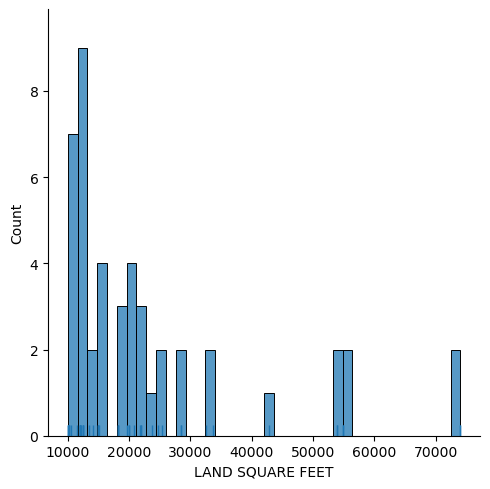

In [74]:
df_landsf = df[(df['LAND SQUARE FEET'] > 10000) & (df['LAND SQUARE FEET'] < 10000000)]
sns.displot(df_landsf['LAND SQUARE FEET'], bins=40, rug=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8268\1436157739.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landsf['LOG_LAND'] = np.log(df_landsf['LAND SQUARE FEET'])


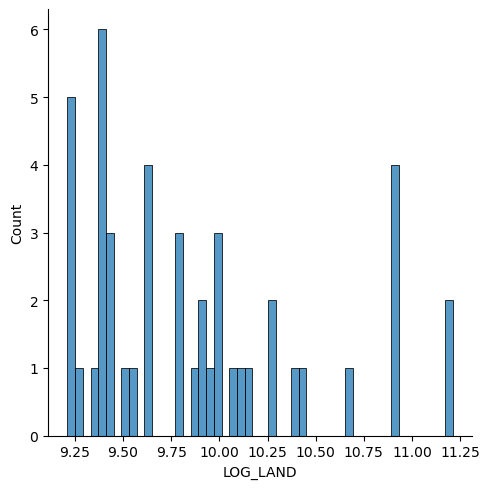

In [75]:
df_landsf['LOG_LAND'] = np.log(df_landsf['LAND SQUARE FEET'])
sns.displot(df_landsf['LOG_LAND'], bins=50)

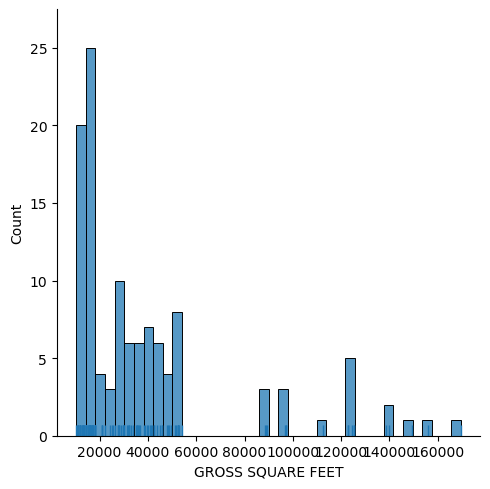

In [76]:
df_grosssf = df[(df['GROSS SQUARE FEET'] > 10000) & (df['GROSS SQUARE FEET'] < 10000000)]
sns.displot(df_grosssf['GROSS SQUARE FEET'], bins=40, rug=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8268\1770270442.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_grosssf['LOG_GROSS'] = np.log(df_grosssf['GROSS SQUARE FEET'])


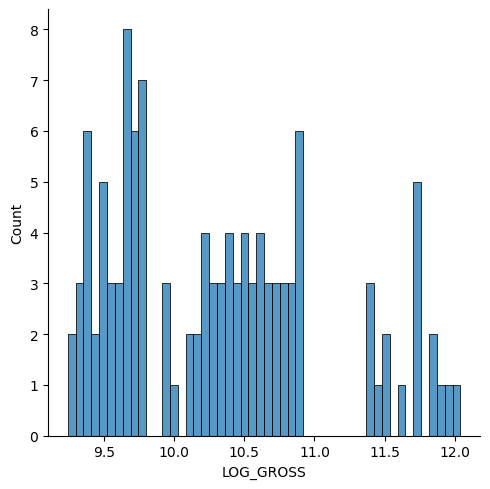

In [77]:
df_grosssf['LOG_GROSS'] = np.log(df_grosssf['GROSS SQUARE FEET'])
sns.displot(df_grosssf['LOG_GROSS'], bins=50)

In [ ]:
df.groupby("BOROUGH")["SALE PRICE"].describe() #mendeskripsikan berdasarkan kolom borough dan sale price

### Confidence Intervals

#### CI for the population Proportion

Berdasarkan hasil data sebelumnya diperoleh rata-rata Sale Price untuk property di New York yaitu 1.280.703 dan wilayah yang paling sering muncul yaitu wilayah Brooklyn.

Bagaimana CI untuk proporsi property terjual di wilayah Brooklyn?

In [78]:
mean_brooklyn = 8.41
sd = 3.95       
n = 23843       
z = 1.96
se = sd/np.sqrt(n)
se

0.025580948668524728

In [79]:
lowerlimit = mean_brooklyn-z*se #lower limit of the CI
upperlimit = mean_brooklyn+z*se#upper limit of the CI
lowerlimit,upperlimit 

(8.359861340609692, 8.460138659390308)

Dari perhitungan diperoleh Confidence interval untuk proporsi property di wilayah Brooklyn adalah di rentang 8.35 sampai 8.46.

### Hypothesis Testing

#### Difference in Population Means

Apakah ada perbedaan residential unit yang terjual pada tahun 2005 - 2009 dan tahun 2010 ke atas?

Population:

- Total Units in NYC Property Sales data

Parameter of Interest:

- μ1 − μ2
- Year Built

Taraf signifikansi :

- alpha = 5% = 0.05

Hypothesis :

- H0 (Null Hypothesis) : μ1 = μ2 (tidak terdapat perbedaan unit terjual antara property yang dibangun tahun 1900 - 2000 dan tahun 2001 ke atas)
- H1 (Alternative Hypthosis) : μ1 ≠ μ2 (terdapat perbedaan unit terjual antara property yang dibangun tahun 1900 - 2000 dan tahun 2001 ke atas)

In [80]:
df_res = df[['RESIDENTIAL UNITS','YEAR BUILT']]
df_res.head()

,RESIDENTIAL UNITS,YEAR BUILT
73,47,2005
75,132,1989
76,1,0
77,1,0
78,1,0


In [81]:
df_res["YEAR BUILT"] = df["YEAR BUILT"].astype("int")
df_pvalue1 = df_res[
    (df_res['YEAR BUILT'] > 2005) &
    (df_res['YEAR BUILT'] < 2010)]
df_pvalue1.head()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8268\3152287889.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_res["YEAR BUILT"] = df["YEAR BUILT"].astype("int")


,RESIDENTIAL UNITS,YEAR BUILT
129,1,2008
183,1,2006
184,1,2006
186,1,2007
488,1,2007


In [82]:
df_pvalue2 = df_res[(df_res['YEAR BUILT'] > 2010)]
df_pvalue2.head()

,RESIDENTIAL UNITS,YEAR BUILT
88,1,2014
89,1,2014
90,1,2014
91,1,2014
92,1,2014


In [83]:
n1 = len(df_pvalue1)
mu1 = df_pvalue1["RESIDENTIAL UNITS"].mean()
sd1 = df_pvalue1["RESIDENTIAL UNITS"].std()
n2 = len(df_pvalue2)
mu2 = df_pvalue2["RESIDENTIAL UNITS"].mean()
sd2 = df_pvalue2["RESIDENTIAL UNITS"].std()

In [84]:
(n1, mu1, sd1)

(2708, 0.9531019202363368, 5.422150929595555)

In [85]:
(n2, mu2, sd2)

(3456, 1.333912037037037, 11.428259404969786)

In [86]:
sm.stats.ztest(df_pvalue1["RESIDENTIAL UNITS"], df_pvalue2["RESIDENTIAL UNITS"], alternative='two-sided')

(-1.5987230332424165, 0.10988215735226758)

Syarat penolakan H0 :

- H0 ditolak jika nilai p-value < alpha = 0.05

Keputusan :

- H0 diterima karena nilai p-value = 0.806955951776814 > alpha = 0.05

Kesimpulan :

- Pada taraf signifikansi 5%, karena nilai p-value = 0.806955951776814 > alpha = 0.05 maka kita dapat menerima H0 sehingga tidak terdapat perbedaan residential unit yang terjual pada tahun 2005 - 2009 dan tahun 2010 keatas (rata-rata residential unit yang terjual pada tahun 2005 - 2009 sama dengan property yang dibangun pada tahun 2010 keatas)